# Batch correction

In this notebook we aim to assess the observed batch effects in the given data set. Thereby we will focus on two types of batch effects. The first and the stronger one is the change of the imaging setup that was performed when switching between the four channels and the three channel setup. The second type is due to the change of the gain for the DNA channel between each sample. We will assess the effect of simple batch correction techniques on the histograms of the DNA, gH2AX and Lamin A/C channel images for a number of samples representative of the individual batch effects.

---

## 0. Environmental setup

To begin we load required software packages.

In [1]:
import numpy as np
import pandas as pd
import sys
import os
from tifffile import imread
import matplotlib.pyplot as plt
from skimage.exposure import equalize_adapthist

sys.path.append("../../..")
from src.utils.io import get_file_list


seed = 1234
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def read_in_images(root_dir):
    imgs = []
    img_locs = get_file_list(root_dir)
    for img_loc in img_locs:
        imgs.append(imread(img_loc))
    return imgs

<IPython.core.display.Javascript object>

---

## 1. Batch effects due to imaging setup

We first assess the observed batch effects that we see when switching between the imaging setups.

### 1.1. Read in data

To this end, we will load a couple images from the same biological sample once imaged in the 3-channel and the 4-channel setup.

In [3]:
imgs_3ch = read_in_images(
    "../../../data/comparison/P22a_1_PBMCs_Dapi_gH2AX_LaminA_C_11_10_21_2X_16bit_2X/raw"
)

<IPython.core.display.Javascript object>

In [4]:
imgs_4ch = read_in_images(
    "../../../data/comparison/P22b_1_PBMCs_Dapi_gH2AX_LaminA_C_CD3_11_10_21_2X_16bit_2X/raw"
)

<IPython.core.display.Javascript object>

---

### 1.2. Visualization of the data

Next, we will visualize the observed batch effects. To this end, we will plot a few randomly chosen examples for each batch and their corresponding intensity profiles for each of the three channels.

In [6]:
def visualize_datasets(
    datasets,
    dataset_names,
    channel=0,
    n_samples=5,
    plot_profile=True,
    normalized=False,
):
    idc = list(range(min(len(datasets[0]), len(datasets[1]))))
    sample_idc = np.random.choice(idc, size=n_samples)
    for idx in sample_idc:
        fig, ax = plt.subplots(figsize=[20, 20], ncols=2, nrows=2)
        for i in range(2):
            img = datasets[i][idx][:, channel]
            if normalized:
                img = (img - img.min()) / (img.max() - img.min())
                img *= (2 ** 16) - 1
            ax[0, i].imshow(img.max(axis=0), vmin=0, vmax=2 ** 16, cmap="inferno")
            ax[0, i].set_title("Sample from {}".format(dataset_names[i]))
            ax[1, i].hist(img.flatten(), bins=200)
            ax[1, i].set_title("Sample from {}".format(dataset_names[i]))
        plt.show()

<IPython.core.display.Javascript object>

In [12]:
from skimage.exposure import match_histograms
from scipy.stats import describe

# matched = match_histograms(imgs_3ch[0][:, 1], imgs_4ch[0][:, 1])

<IPython.core.display.Javascript object>

In [10]:
gh2ax_1 = []
gh2ax_2 = []

for img in imgs_3ch[:5]:
    gh2ax_1.extend(list(img[:, 1].ravel()))
gh2ax_1 = np.array(gh2ax_1)
for img in imgs_4ch[:5]:
    gh2ax_2.extend(list(img[:, 2].ravel()))
gh2ax_2 = np.array(gh2ax_2)

<IPython.core.display.Javascript object>

In [13]:
describe(gh2ax_1)

DescribeResult(nobs=209715200, minmax=(0, 59623), mean=153.96711162567138, variance=300174.1175396657, skewness=9.465188961379877, kurtosis=138.1306617091049)

<IPython.core.display.Javascript object>

In [15]:
describe(gh2ax_2)

DescribeResult(nobs=209715200, minmax=(0, 20728), mean=64.6472394323349, variance=28434.295279197773, skewness=12.672298336683717, kurtosis=304.9544668400202)

<IPython.core.display.Javascript object>

#### DNA images

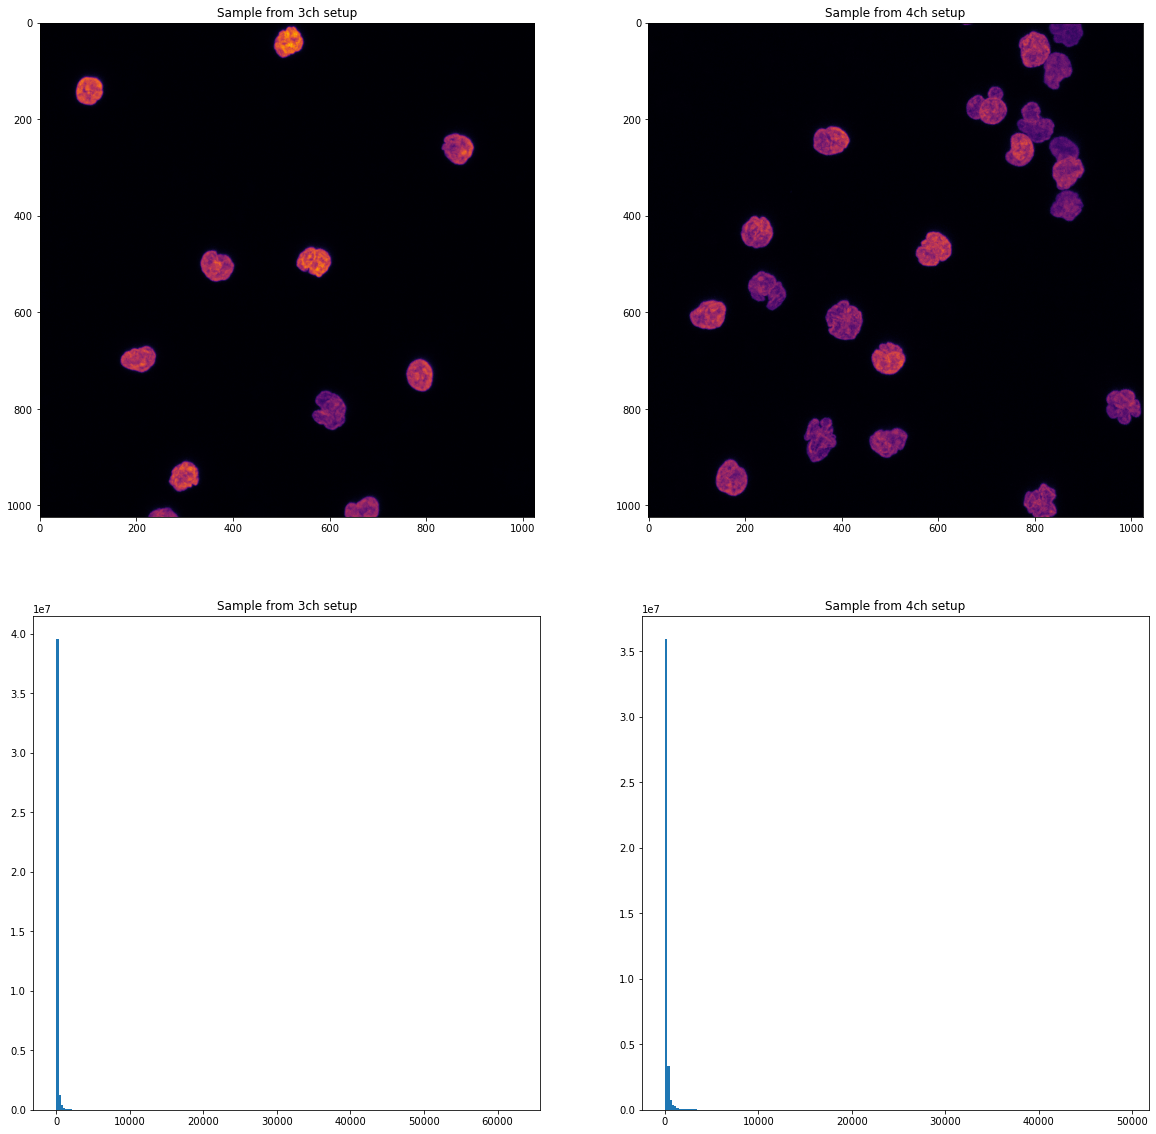

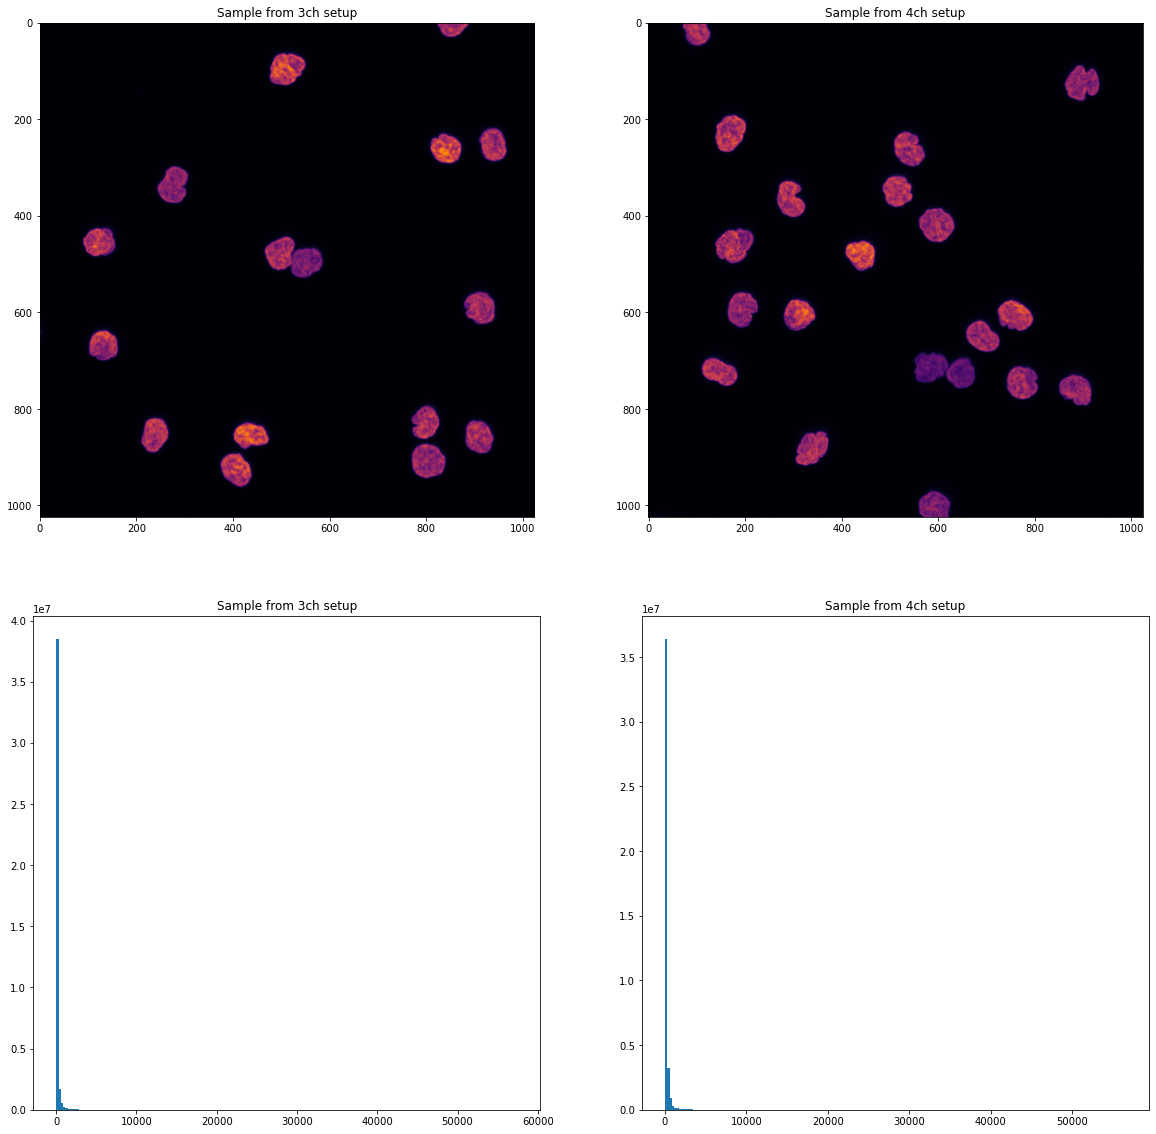

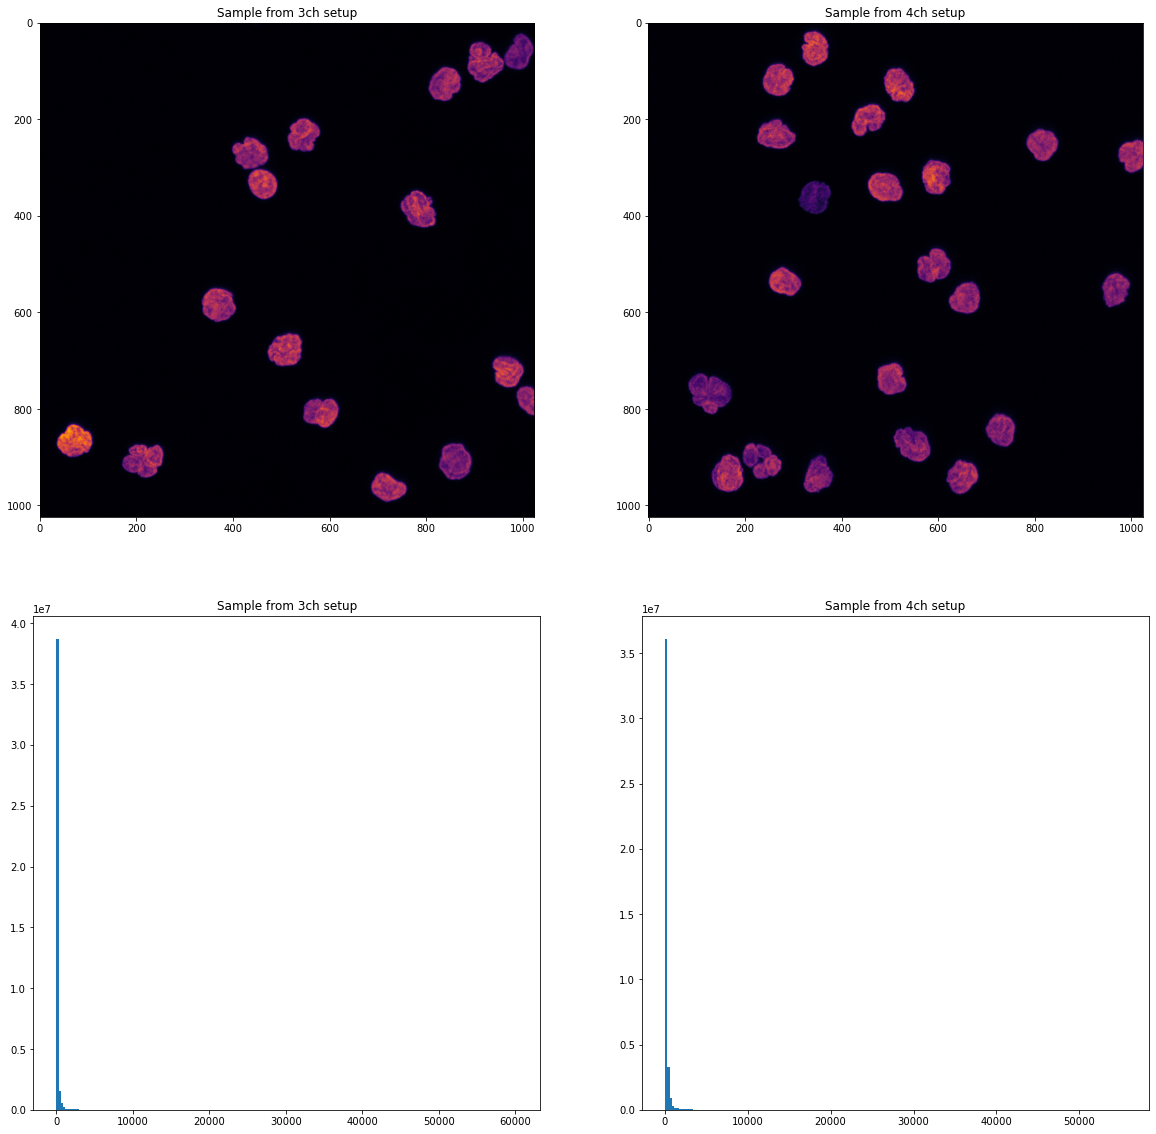

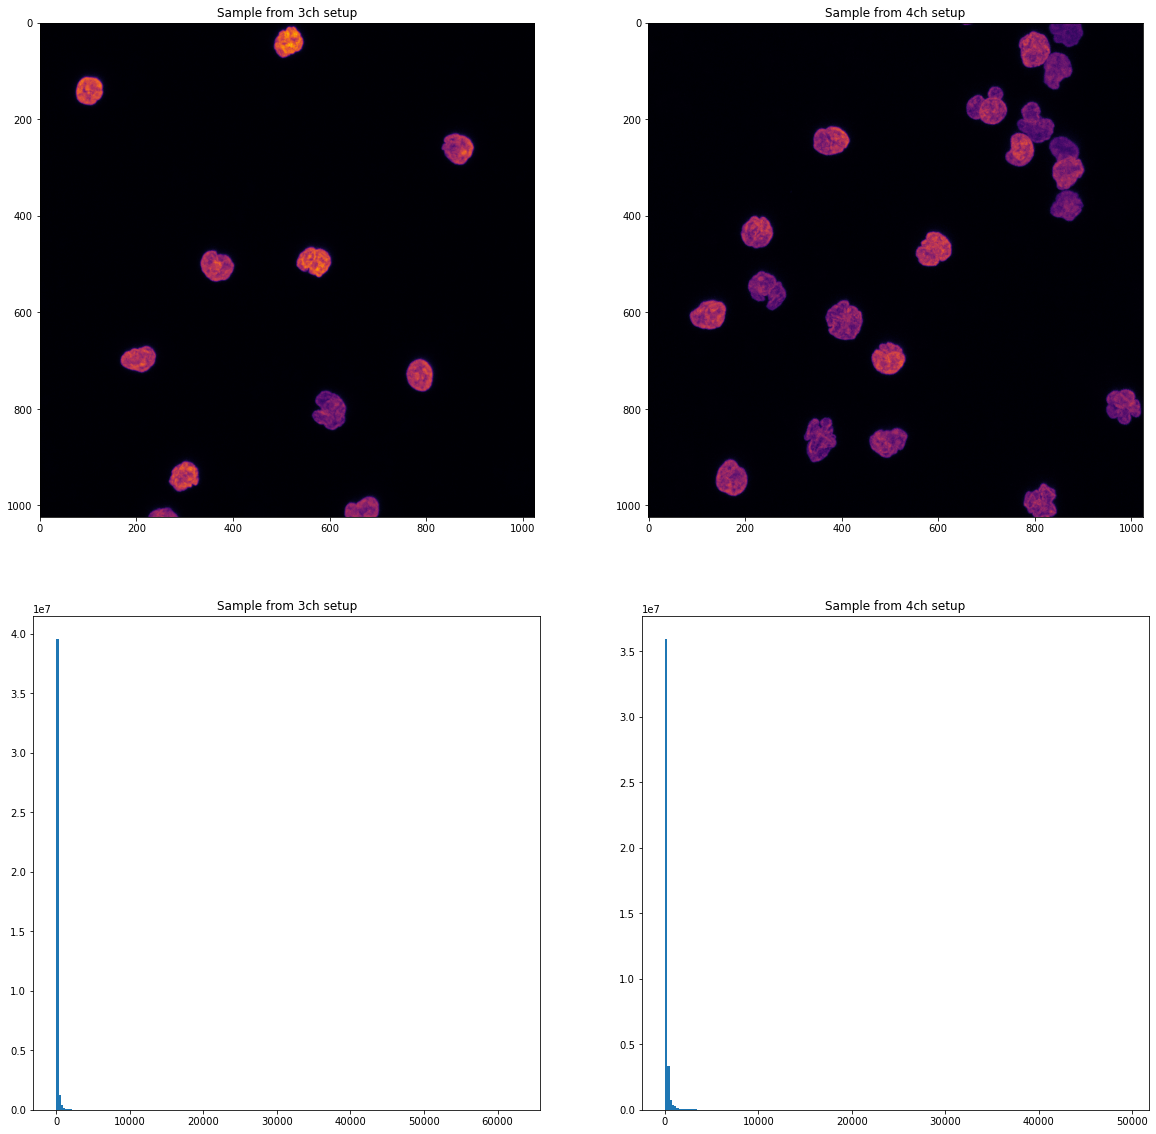

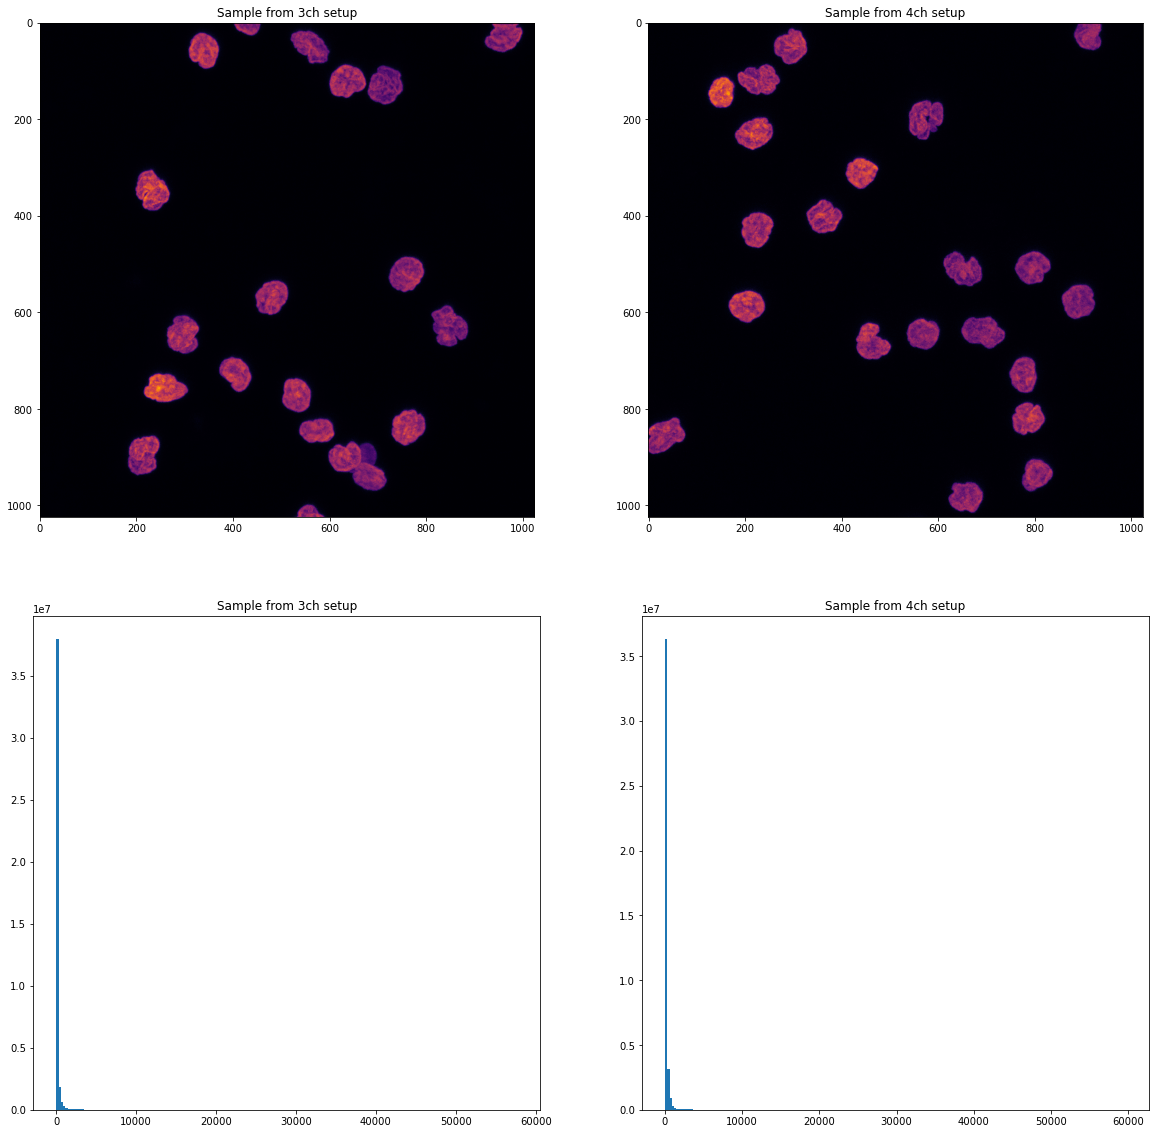

<IPython.core.display.Javascript object>

In [7]:
visualize_datasets(
    datasets=[imgs_3ch, imgs_4ch],
    dataset_names=["3ch setup", "4ch setup"],
    normalized=False,
)

At first glance, the DNA images do not show any strong batch effects after range normalization.

---

#### gH2AX images

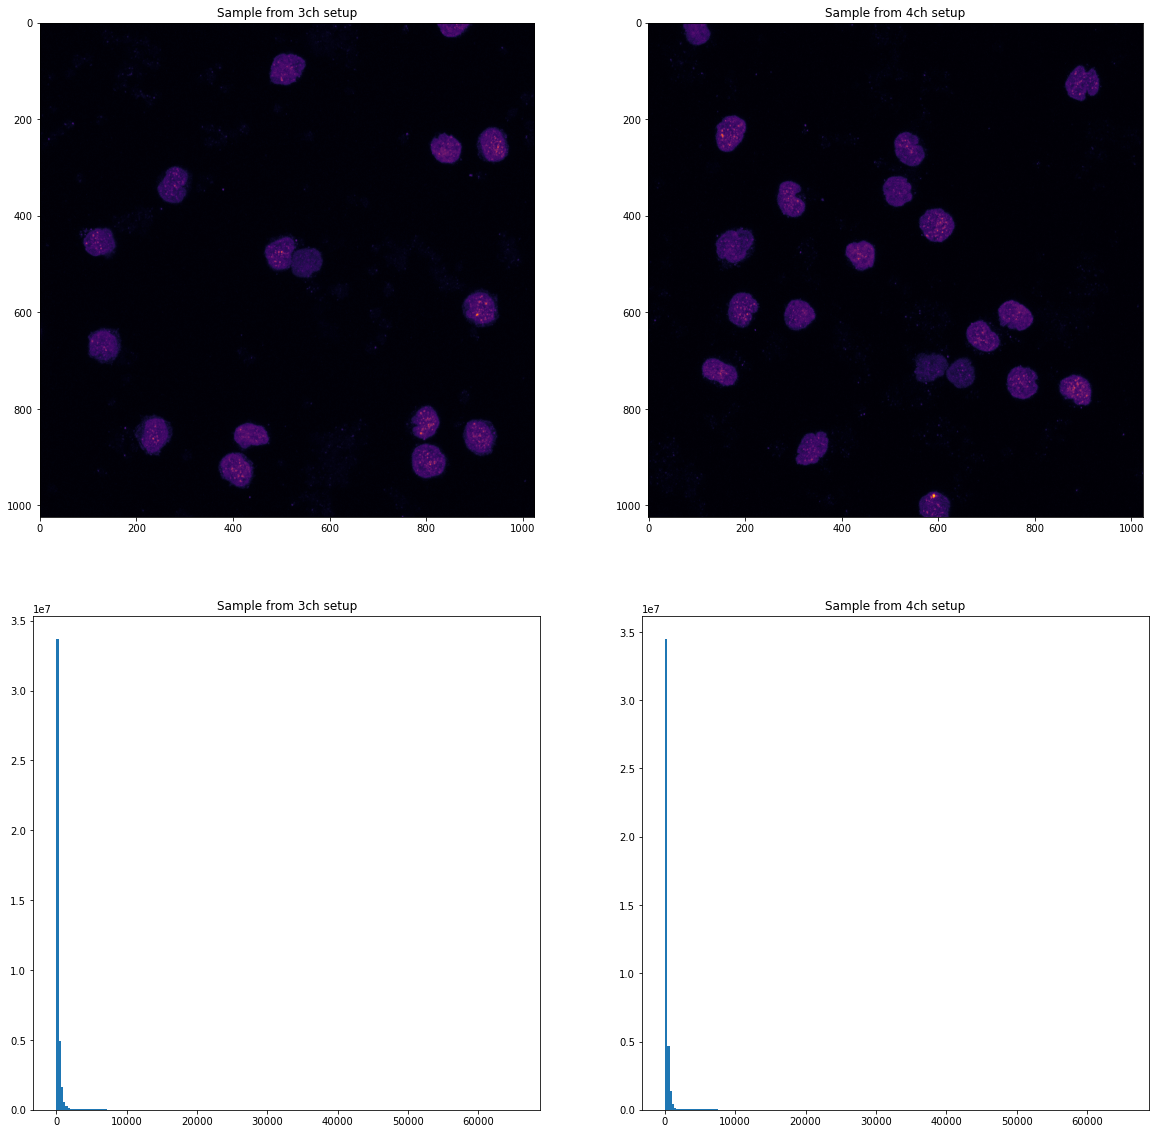

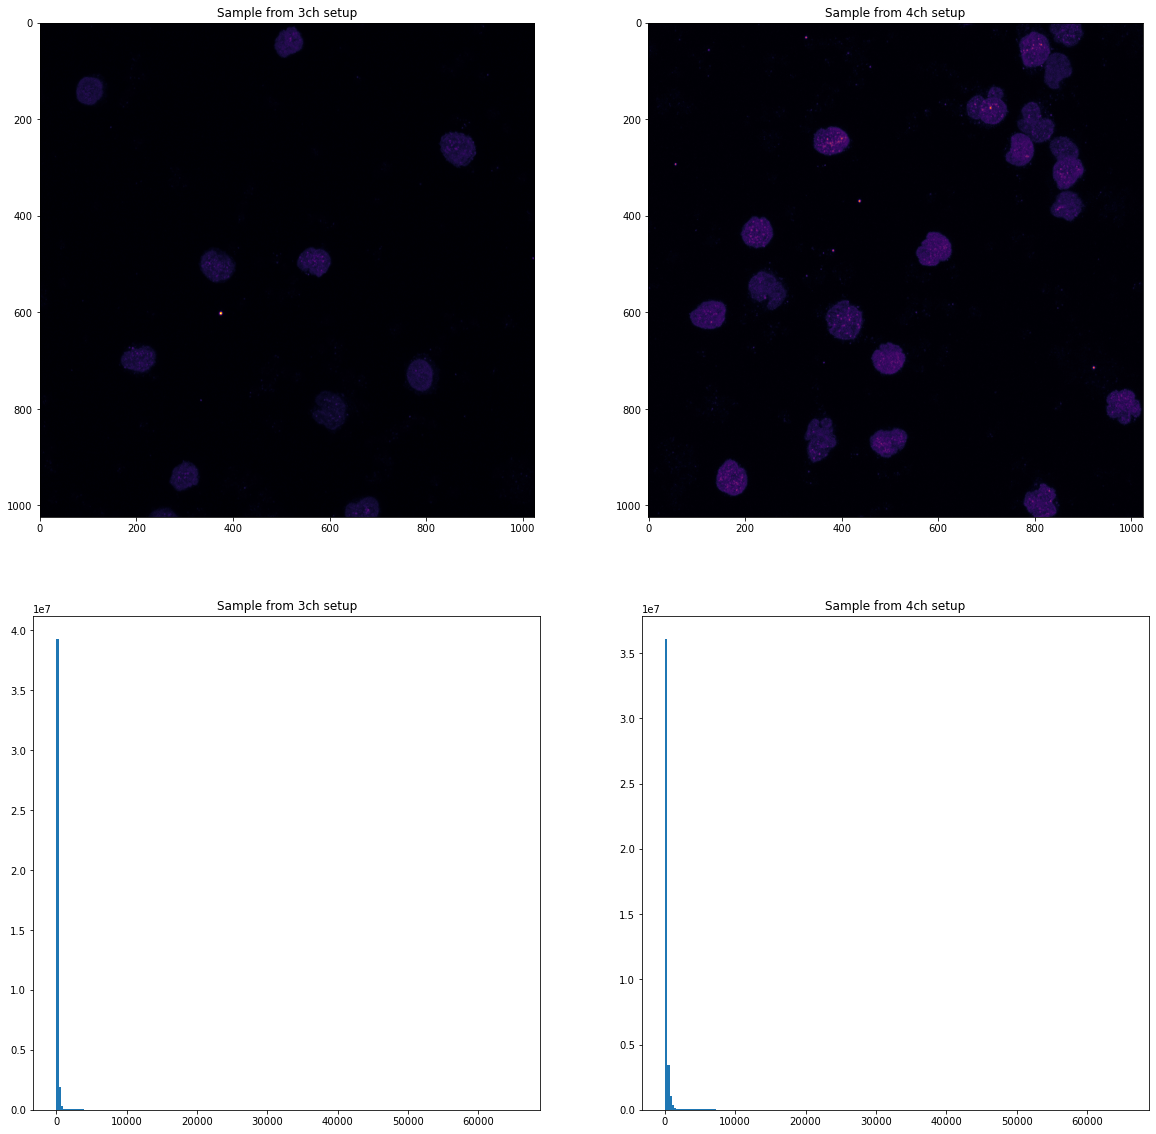

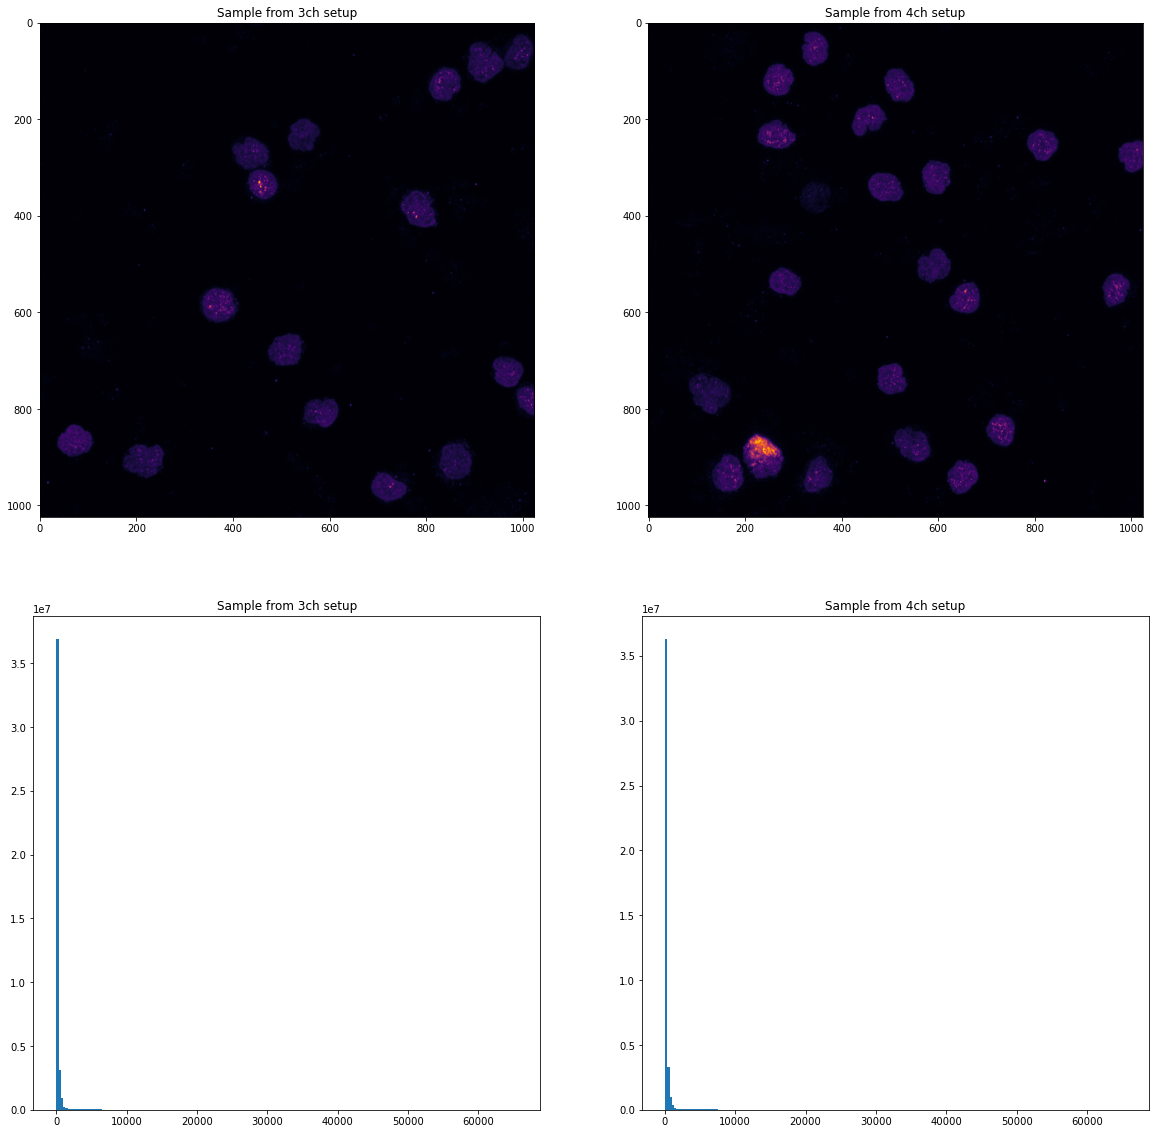

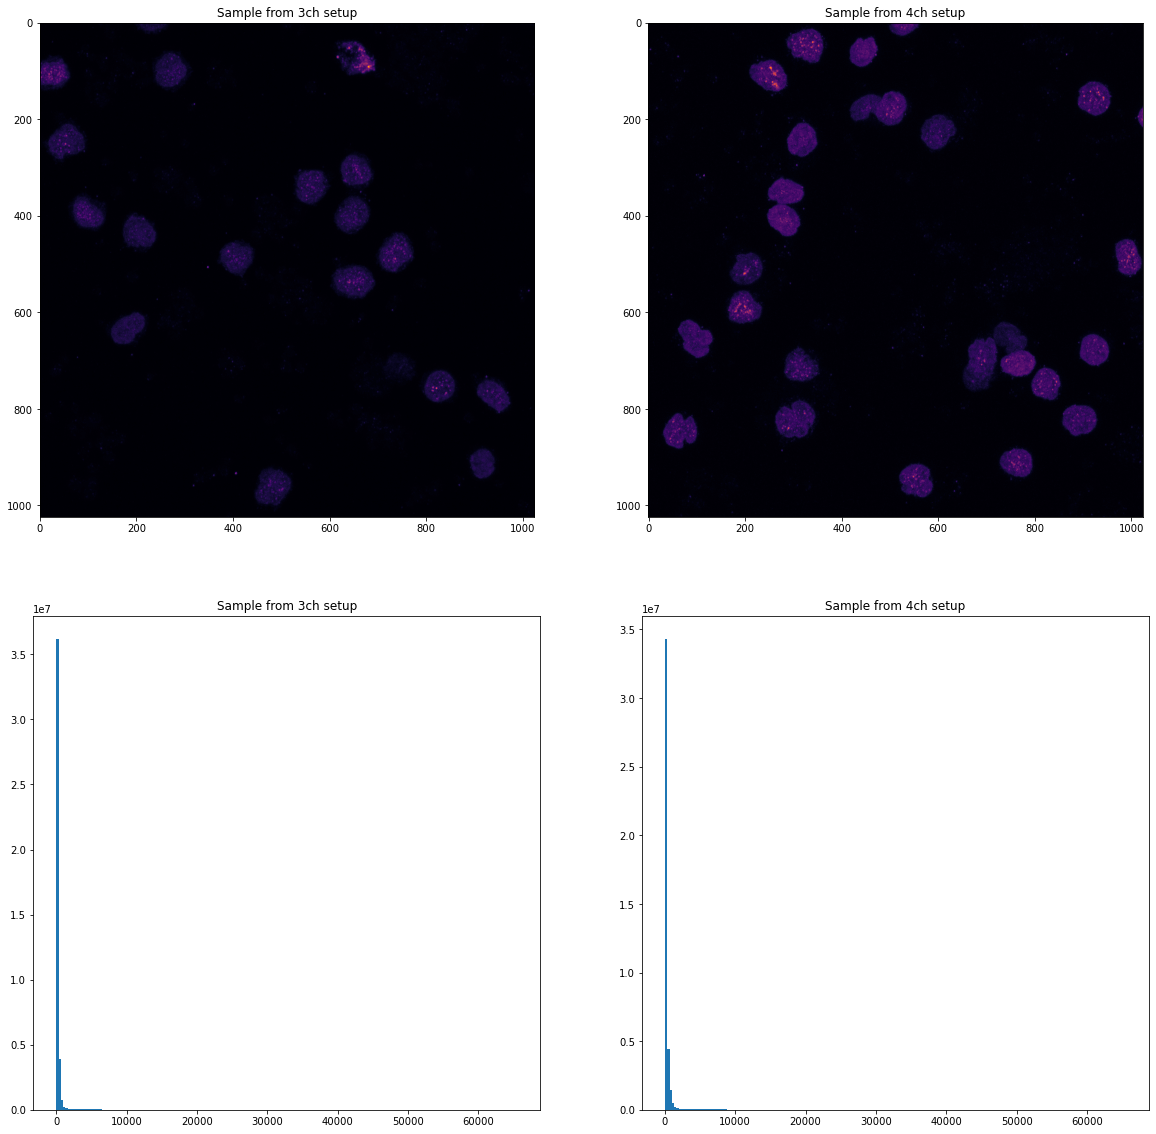

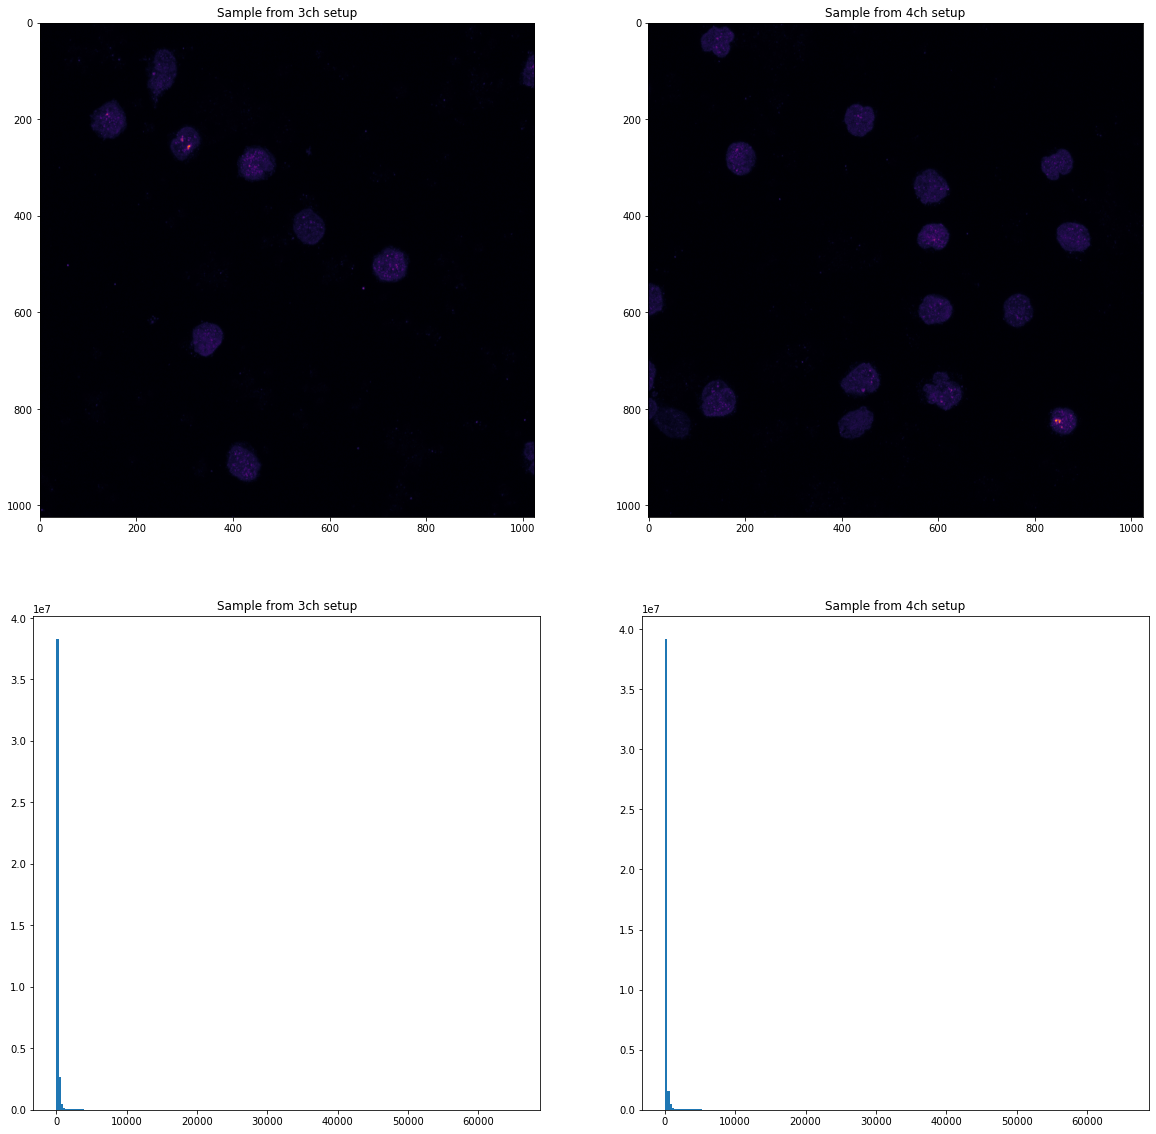

<IPython.core.display.Javascript object>

In [7]:
visualize_datasets(
    datasets=[imgs_3ch, imgs_4ch],
    dataset_names=["3ch setup", "4ch setup"],
    channel=1,
    normalized=True,
)

---

#### Lamin A/C

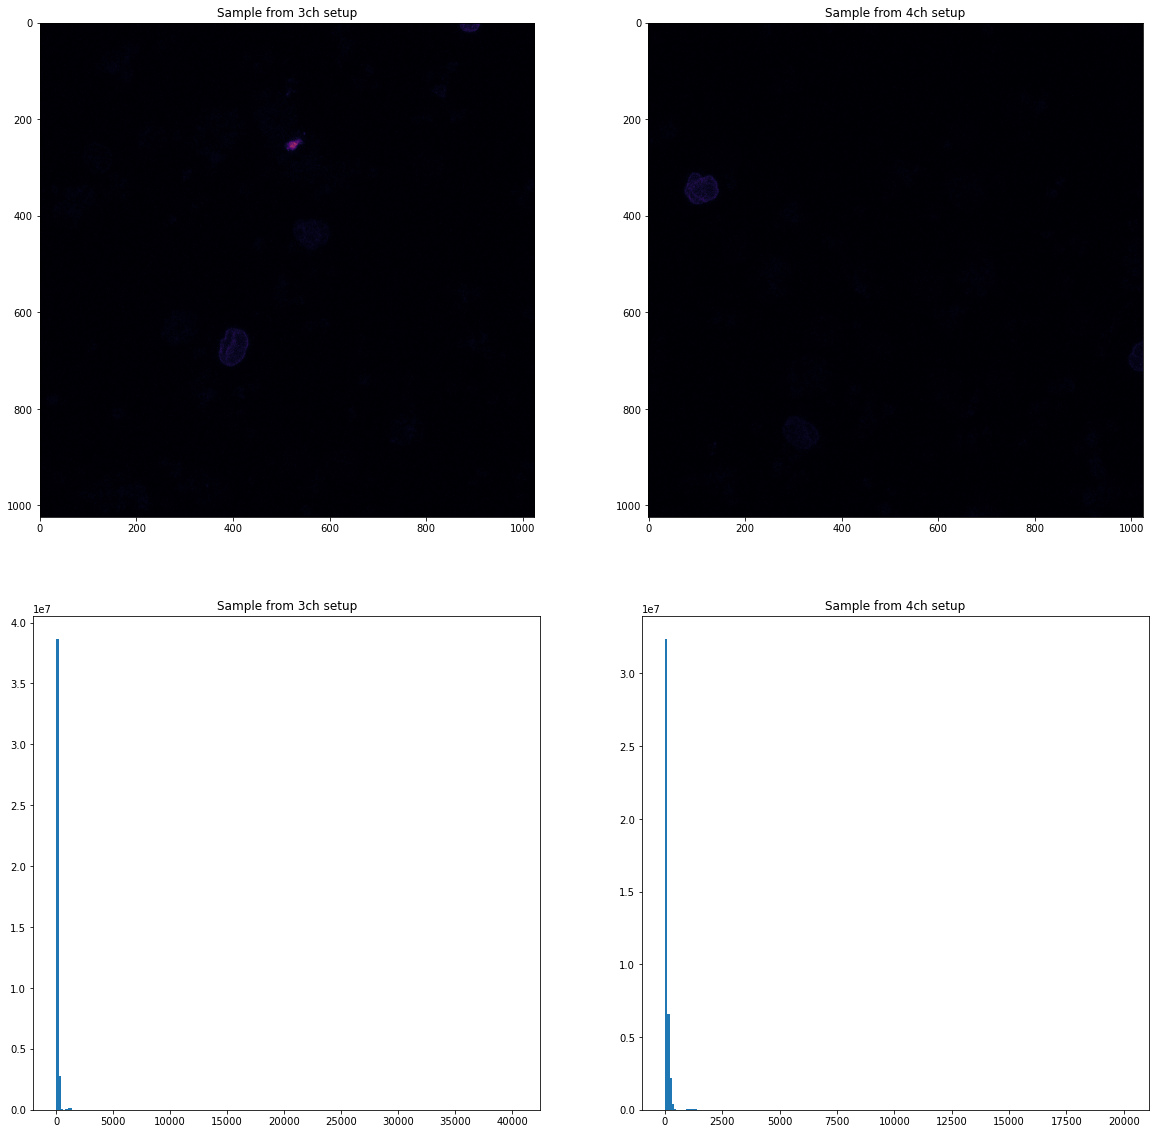

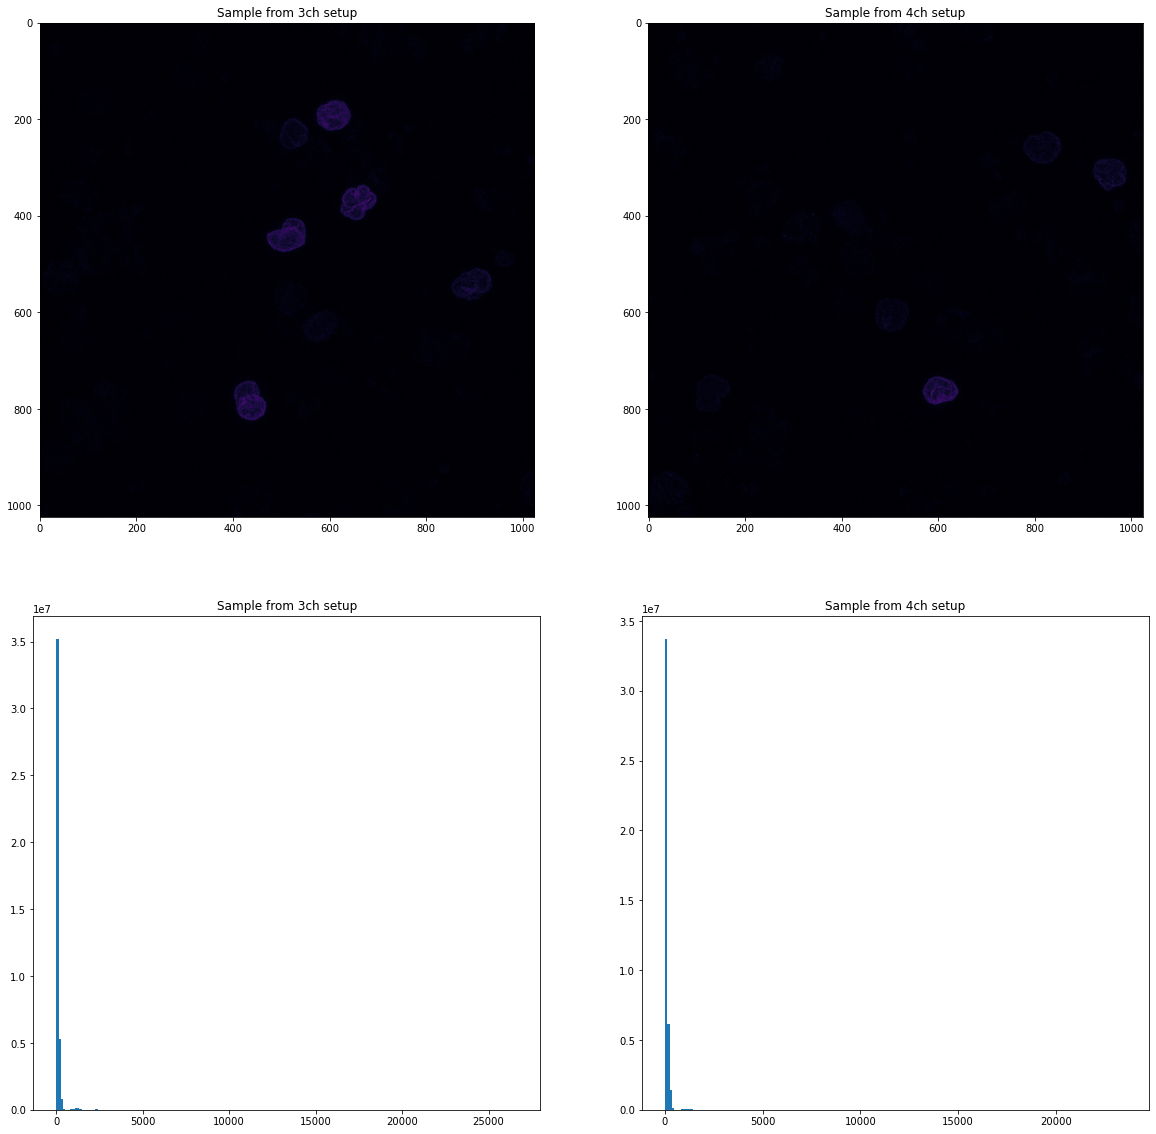

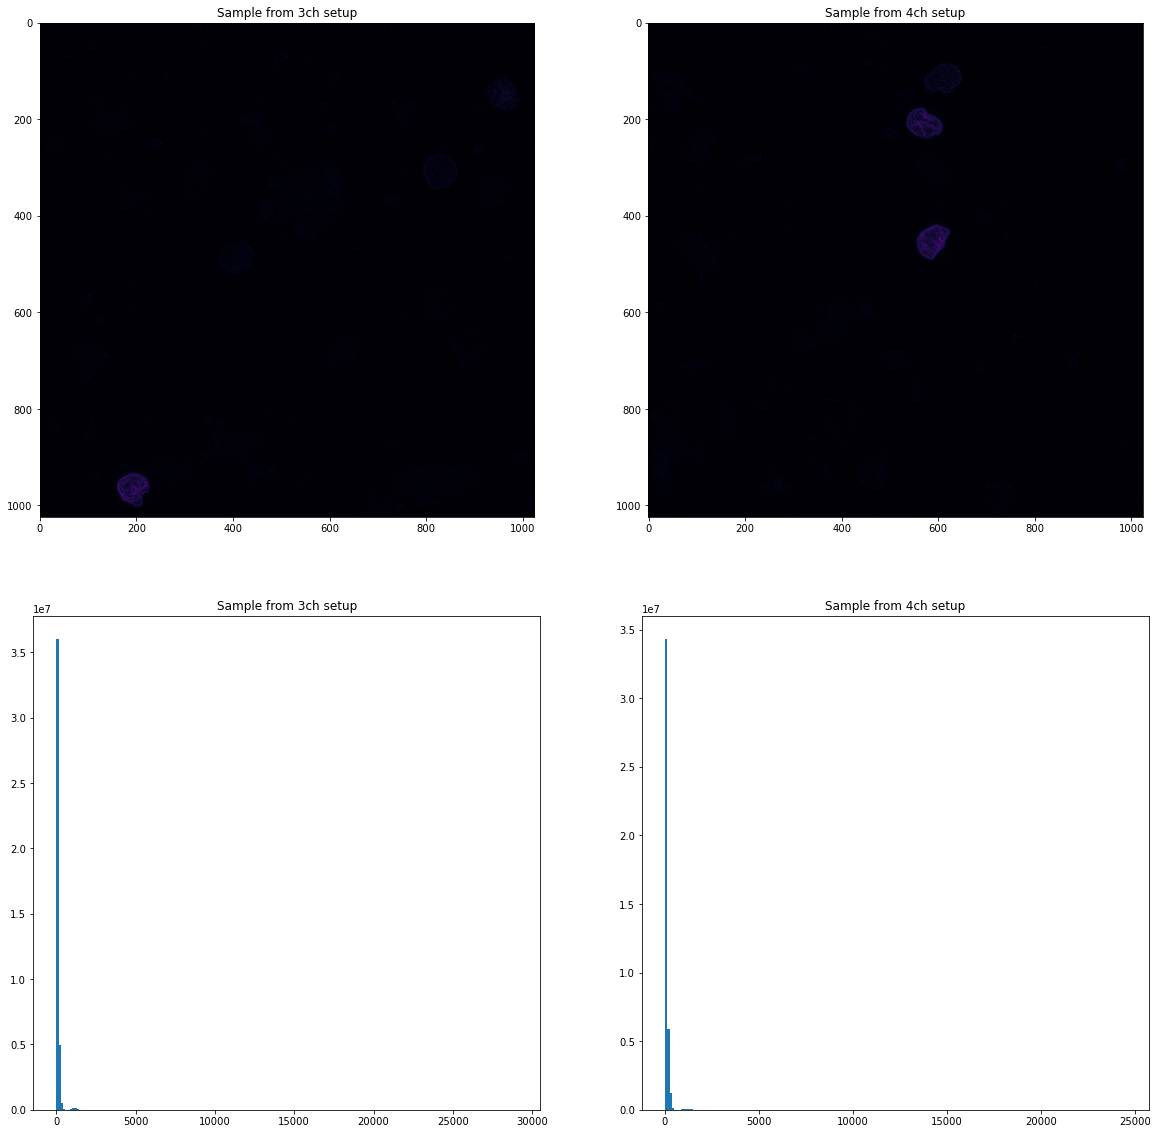

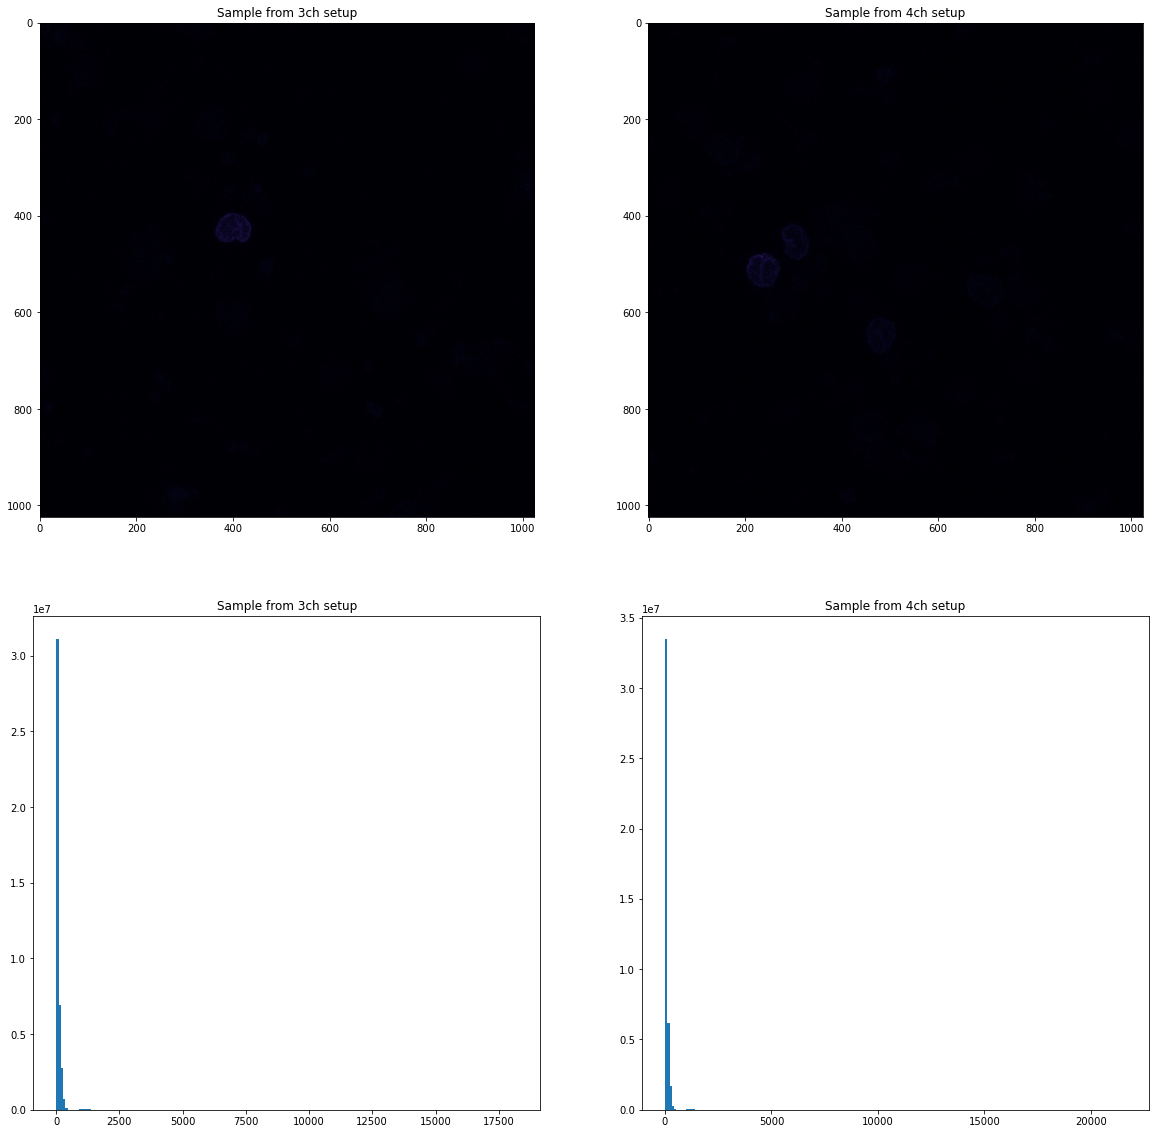

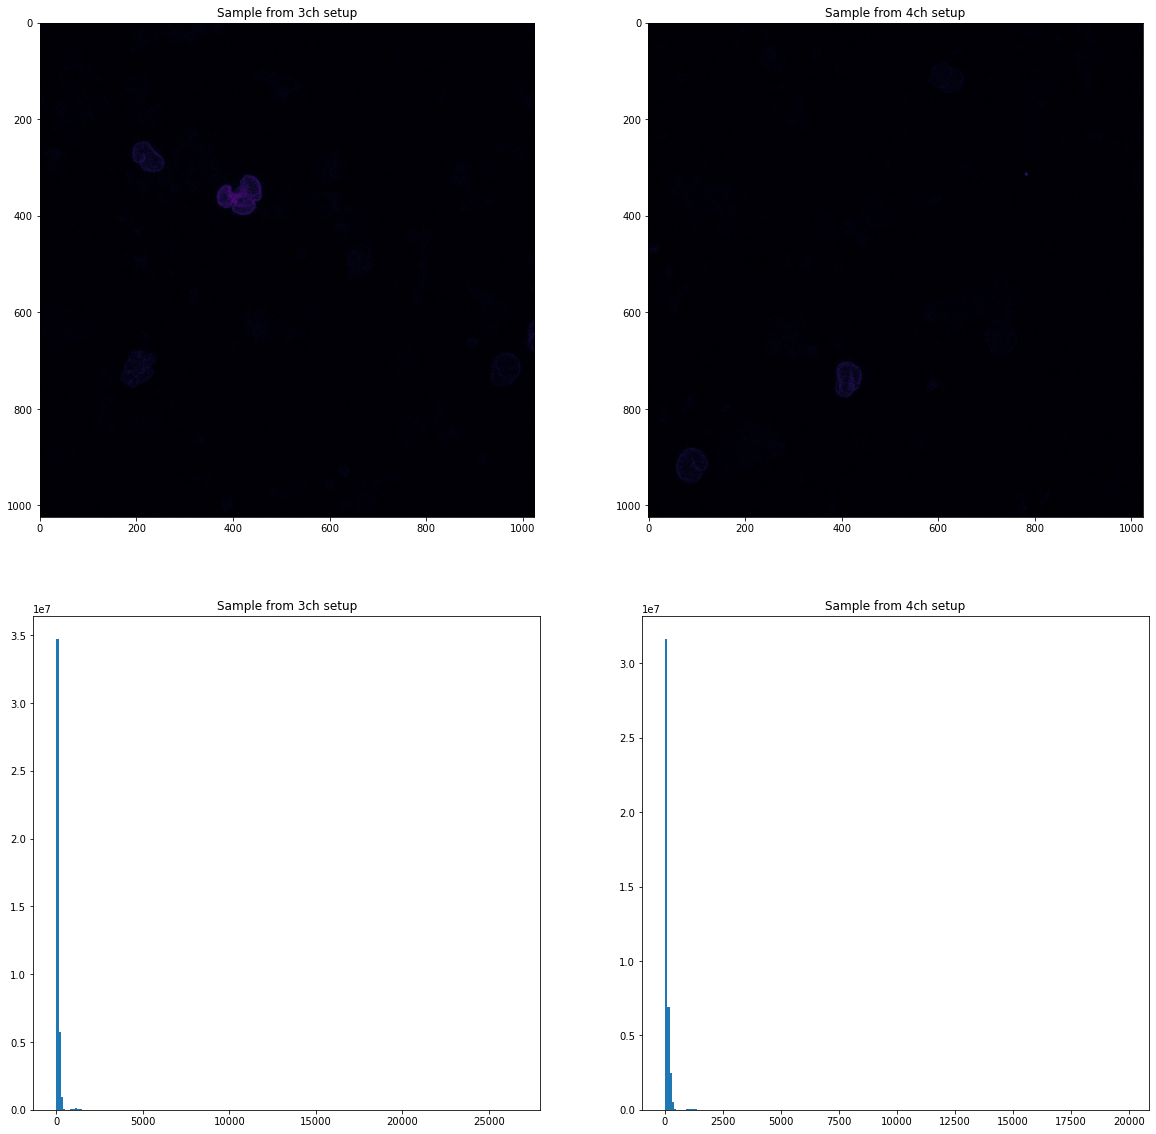

<IPython.core.display.Javascript object>

In [9]:
visualize_datasets(
    datasets=[imgs_3ch, imgs_4ch],
    dataset_names=["3ch setup", "4ch setup"],
    channel=2,
    normalized=False,
)